In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
relativeFilepath="/Users/mitsuki/rsyncdir/files/summary_relative.csv"
relative_df=pd.read_csv(relativeFilepath)
print(relative_df.shape)
relative_df.head()

(64600, 9)


,ftp_basename,seq_type,thres,+1,+2,+3,-1,-2,-3
0,GCF_000022385.1_ASM2238v1,real,50,2327052,848004,1018122,1425243,1432585,2007550
1,GCF_000022385.1_ASM2238v1,real,100,2326662,190040,323132,603018,594940,1451209
2,GCF_000022385.1_ASM2238v1,real,150,2326326,53848,132495,252561,236458,1007576
3,GCF_000022385.1_ASM2238v1,real,200,2316294,27141,60577,105447,89945,635573
4,GCF_000022385.1_ASM2238v1,real,250,2291361,18208,34189,45630,31958,379303


In [3]:
annFilepath="/Users/mitsuki/rsyncdir/files/annotation_summary.csv"
ann_df=pd.read_csv(annFilepath)
print(ann_df.shape)
ann_df.head()

(1689, 7)


,ftp_basename,seq_name,num_cds,num_typical,seq_length,cds_length,typical_length
0,GCF_000022385.1_ASM2238v1,NC_012589.1,2912,2812,2736272,2407159,2327943
1,GCF_000970085.1_ASM97008v1,NZ_CP009506.1,4130,4060,5017558,3809558,3741741
2,GCF_000007345.1_ASM734v1,NC_003552.1,4790,4713,5751492,4306220,4239645
3,GCF_000350305.1_ASM35030v1,NC_020892.1,1473,1473,1461105,1330383,1330383
4,GCF_000969905.1_ASM96990v1,NZ_CP009520.1,3607,3569,4505752,3250767,3211890


In [4]:
sf=ann_df.groupby('ftp_basename')['typical_length'].sum()
typ_df=pd.DataFrame({"ftp_basename":sf.index, "typical_length":sf.values} )
print(typ_df.shape)
typ_df.head()

(1615, 2)


,ftp_basename,typical_length
0,GCF_000005825.2_ASM582v2,3271836
1,GCF_000006175.1_ASM617v2,1530750
2,GCF_000006605.1_ASM660v1,2179200
3,GCF_000006685.1_ASM668v1,968265
4,GCF_000006725.1_ASM672v1,2108028


In [5]:
real_df=relative_df[relative_df["seq_type"]=="real"]
sim_df=relative_df[relative_df["seq_type"]=="sim"]
assert real_df.shape==sim_df.shape
merged_df=pd.merge(real_df, sim_df, on=["ftp_basename", "thres"], suffixes=('_r', '_s'))
print(merged_df.shape)
merged_df.head()

(32300, 16)


,ftp_basename,seq_type_r,thres,+1_r,+2_r,+3_r,-1_r,-2_r,-3_r,seq_type_s,+1_s,+2_s,+3_s,-1_s,-2_s,-3_s
0,GCF_000022385.1_ASM2238v1,real,50,2327052,848004,1018122,1425243,1432585,2007550,sim,2327052,906557,1117083,1438509,1413639,2050187
1,GCF_000022385.1_ASM2238v1,real,100,2326662,190040,323132,603018,594940,1451209,sim,2326662,210440,359985,613785,574993,1546757
2,GCF_000022385.1_ASM2238v1,real,150,2326326,53848,132495,252561,236458,1007576,sim,2326245,59626,141150,251973,218776,1103744
3,GCF_000022385.1_ASM2238v1,real,200,2316294,27141,60577,105447,89945,635573,sim,2316492,26858,62288,101151,75829,741634
4,GCF_000022385.1_ASM2238v1,real,250,2291361,18208,34189,45630,31958,379303,sim,2291724,18931,34451,39711,27395,482587


In [7]:
merged_df=pd.merge(merged_df, typ_df, on="ftp_basename")
print(merged_df.shape)
merged_df.head()

(32300, 23)


,ftp_basename,seq_type_r,thres,+1_r,+2_r,+3_r,-1_r,-2_r,-3_r,seq_type_s,...,-1_s,-2_s,-3_s,+1_d,+2_d,+3_d,-1_d,-2_d,-3_d,typical_length
0,GCF_000022385.1_ASM2238v1,real,50,2327052,848004,1018122,1425243,1432585,2007550,sim,...,1438509,1413639,2050187,0,-58553,-98961,-13266,18946,-42637,2327943
1,GCF_000022385.1_ASM2238v1,real,100,2326662,190040,323132,603018,594940,1451209,sim,...,613785,574993,1546757,0,-20400,-36853,-10767,19947,-95548,2327943
2,GCF_000022385.1_ASM2238v1,real,150,2326326,53848,132495,252561,236458,1007576,sim,...,251973,218776,1103744,81,-5778,-8655,588,17682,-96168,2327943
3,GCF_000022385.1_ASM2238v1,real,200,2316294,27141,60577,105447,89945,635573,sim,...,101151,75829,741634,-198,283,-1711,4296,14116,-106061,2327943
4,GCF_000022385.1_ASM2238v1,real,250,2291361,18208,34189,45630,31958,379303,sim,...,39711,27395,482587,-363,-723,-262,5919,4563,-103284,2327943


In [8]:
assert merged_df["typical_length"].min()>0
for name in ["+1", "+2", "+3", "-1", "-2", "-3"]:
    merged_df[name+"_d"]=merged_df[name+"_r"]-merged_df[name+"_s"]#d for difference
    merged_df[name+"_c"]=merged_df[name+"_d"]/merged_df["typical_length"]

In [9]:
merged_df.head()

,ftp_basename,seq_type_r,thres,+1_r,+2_r,+3_r,-1_r,-2_r,-3_r,seq_type_s,...,-1_d,-2_d,-3_d,typical_length,+1_c,+2_c,+3_c,-1_c,-2_c,-3_c
0,GCF_000022385.1_ASM2238v1,real,50,2327052,848004,1018122,1425243,1432585,2007550,sim,...,-13266,18946,-42637,2327943,0.000000,-0.025152,-0.042510,-0.005699,0.008139,-0.018315
1,GCF_000022385.1_ASM2238v1,real,100,2326662,190040,323132,603018,594940,1451209,sim,...,-10767,19947,-95548,2327943,0.000000,-0.008763,-0.015831,-0.004625,0.008569,-0.041044
2,GCF_000022385.1_ASM2238v1,real,150,2326326,53848,132495,252561,236458,1007576,sim,...,588,17682,-96168,2327943,0.000035,-0.002482,-0.003718,0.000253,0.007596,-0.041310
3,GCF_000022385.1_ASM2238v1,real,200,2316294,27141,60577,105447,89945,635573,sim,...,4296,14116,-106061,2327943,-0.000085,0.000122,-0.000735,0.001845,0.006064,-0.045560
4,GCF_000022385.1_ASM2238v1,real,250,2291361,18208,34189,45630,31958,379303,sim,...,5919,4563,-103284,2327943,-0.000156,-0.000311,-0.000113,0.002543,0.001960,-0.044367


In [25]:
filtered_df=merged_df[merged_df["thres"]==300]
filtered_df[[name+"_c" for name in ["+1","+2","+3","-1","-2","-3"]]].describe()

,+1_c,+2_c,+3_c,-1_c,-2_c,-3_c
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,-0.000064,0.012732,0.072839,0.019283,0.009698,-0.031555
std,0.000360,0.036137,0.102208,0.027650,0.029651,0.041009
min,-0.001681,-0.138214,-0.041161,-0.012193,-0.104614,-0.176629
25%,-0.000262,-0.002838,0.000988,0.000087,-0.000552,-0.054533
50%,-0.000042,0.000072,0.015686,0.006132,0.004938,-0.023795
75%,0.000139,0.021978,0.122262,0.030293,0.018970,-0.003753
max,0.001479,0.206820,0.450891,0.140396,0.164945,0.124249


In [26]:
filtered_df.shape

(1615, 29)

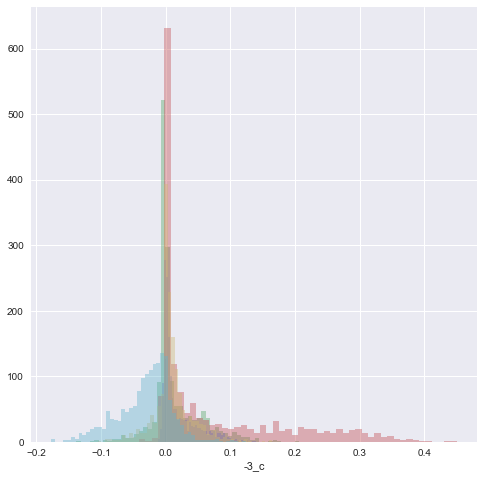

In [29]:
plt.figure(figsize=(8,8))
for name in ["+1","+2","+3","-1","-2","-3"]:
    sns.distplot (filtered_df[name+"_c"], kde=False, bins =50)
#plt.plot()

['+1_c', '+2_c', '+3_c', '-1_c', '-2_c', '-3_c']

In [ ]:
pd.DataFrame(typ_df)

In [ ]:
filtered_df=merged_df[merged_df["thres"]==300]
filtered_df.describe()

In [ ]:
filtered_df.head(20)

In [ ]:
filtered_df.head()

In [ ]:
filtered_df["-2_ratio"]

In [ ]:
merged_df

In [ ]:
def myplot(df, xClm, yClm):
    plt.figure(figsize=(8,8))
    sns.regplot(xClm,yClm,data=df,fit_reg=False)
    plt.plot([0,6],[0,6],"k:")
    plt.xlabel("")
    plt.ylabel("")
    plt.tick_params(labelsize=15)
    plt.show()

In [ ]:
real_df

In [ ]:
df2 = pd.read_csv(filepath,index_col=["ftp_basename","seq_type","thres"])
df2.head(30)

In [ ]:
df2[]

In [ ]:
df2[df2[]]